# Step 1. Importing all the necessary libraries: 

In [2]:
# 1. importing the basic Libraries. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 1.0 - 
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 2. For Handling Missing values. -> Imputing method. 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import HistGradientBoostingRegressor

# 3. for Handling Categorical columns. 
from sklearn.preprocessing import LabelEncoder

# 4. For scaling. 
from sklearn.preprocessing import StandardScaler

# 5. For Model clustering.  
from sklearn.cluster import KMeans

#6. For plotting.
from sklearn.decomposition import PCA

# Step 2: Loading the data. 

In [4]:
file = pd.read_csv('players_20.csv')
file.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

##### Drop player_url and long_name column 

In [6]:
df = file.drop(columns=['player_url', 'long_name'], axis=1)

##### Seeing some information on the columns, its types and maybe null values. 

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 102 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    short_name                  object 
 2    age                         int64  
 3    dob                         object 
 4    height_cm                   int64  
 5    weight_kg                   int64  
 6    nationality                 object 
 7    club                        object 
 8    overall                     int64  
 9    potential                   int64  
 10   value_eur                   int64  
 11   wage_eur                    int64  
 12   player_positions            object 
 13   preferred_foot              object 
 14   international_reputation    int64  
 15   weak_foot                   int64  
 16   skill_moves                 int64  
 17   work_rate                   object 
 18   body_type                   object 
 19   re

#### From the df.info() we got to know that there are: 
Float features -> 16, 
Int Features -> 45, 
Object features -> 41 

##### Seeing some 5-point summary statistics of Numerical columns. 

In [11]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

##### Okay, Now it's time for Missing values => Null values. 

In [13]:
df.isnull().sum()

sofifa_id        0
short_name       0
age              0
dob              0
height_cm        0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 102, dtype: int64

##### In the above results, its hard to understand and deaal with. Therefore let's get only those information of columns with null values. 

#### Get the columns with null values only with percentage. 

In [16]:
null_columns = df.isnull().sum() 
null_columns = null_columns[null_columns>0]
missing_percentage = (df.isnull().mean()) * 100
missing_percentage = missing_percentage[missing_percentage > 0.0]
print(missing_percentage)

release_clause_eur       7.101433
player_tags             91.798884
team_position            1.313054
team_jersey_number       1.313054
loaned_from             94.266331
joined                   7.046723
contract_valid_until     1.313054
nation_position         93.839589
nation_jersey_number    93.839589
pace                    11.139074
shooting                11.139074
passing                 11.139074
dribbling               11.139074
defending               11.139074
physic                  11.139074
gk_diving               88.860926
gk_handling             88.860926
gk_kicking              88.860926
gk_reflexes             88.860926
gk_speed                88.860926
gk_positioning          88.860926
player_traits           58.605974
ls                      11.139074
st                      11.139074
rs                      11.139074
lw                      11.139074
lf                      11.139074
cf                      11.139074
rf                      11.139074
rw            

#### Decision taken: Lett's drop the columns  with missing values >60%. 
1. Columns with > 50% => player_tags, loaned_from, nation_position, nation_jersey_number, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning 
2. Here in the other features with missing values, we can see a pattern is forming. There must be a connection within the features with the missing percentage as 11.1% -> we can use iterative imputer here for imputation purpose.  

In [18]:
df = df.drop(columns=['player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'], axis=1)

# Step 3: Feature Extraction before dealing with Missing Values. 

### Let's do some featture extraction before imputing missing values: 
1. from dob feature -> extract only year, birth month and date is not required for us. 
2. Same with joined feature -> ```````````````````````````````````````````````````````
3. From workrate -> make it a two column of attackworkrate, defenseworkrate. 
4. from ls to rb, create 2 columns for each with ls_current, ls_potential.... 
5. from player_traits -> get the first trait. 

#### 1: Deal with dob feature. 

In [22]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['birth_year'] = df['dob'].dt.year

#### 2. Deal with joined feature. 

In [24]:
df['joined'] = pd.to_datetime(df['joined'], errors='coerce')
df['joining_year'] = df['joined'].dt.year

#### 3: Deal with work_rate 

In [26]:
df[['AttackWorkRate', 'DefenseWorkRate']] = df['work_rate'].map(lambda x:x.split('/')).apply(pd.Series)

#### 4: From ls to rb, create two columns with ls_current, ls_potential. 

In [28]:
columns = ['ls',  'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
          'lb', 'lcb', 'cb', 'rcb', 'rb']
n_cols1 = []

for i in columns: 
    n_cols1.append(f'{i}_current')
#print(n_cols1)

n_cols2 = [] 
for i in columns: 
    n_cols2.append(f'{i}_potential')
#print(n_cols2)

for col in range(len(columns)): 
    df[[n_cols1[col], n_cols2[col]]] = df[columns[col]].str.split('+', expand=True)
    df[n_cols1[col]] = df[n_cols1[col]].astype('float64')
    df[n_cols2[col]] = df[n_cols2[col]].astype('float64')

##### I made a mistake, ls_potential should be ls_current + ls_potential 

In [30]:
for col in range(len(n_cols2)):
    df[n_cols2[col]] = df[n_cols1[col]] + df[n_cols2[col]]

In [31]:
# Drop the columns ls-rb . 
df = df.drop(columns=columns, axis=1)

#### 5: deal with player_traits 

In [33]:
df['player_traits_prior'] = df['player_traits'].str.split(',', expand=True)[0]

#### 6: Deal with player_positions ->  extracting player's main position. 

In [35]:
df['player_main_position'] = df['player_positions'].str.split(',', expand=True)[0]

#### Let's erase the trace of other unnecessary columns as the result of feature extraction.
1. I realized that the primary position of the player is already there, disguised as team position, -> I will drop my column 

In [37]:
df = df.drop(columns=['dob', 'work_rate', 'joined', 'player_main_position'])

In [38]:
df

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,real_face,release_clause_eur,team_position,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,birth_year,joining_year,AttackWorkRate,DefenseWorkRate,ls_current,ls_potential,st_current,st_potential,rs_current,rs_potential,lw_current,lw_potential,lf_current,lf_potential,cf_current,cf_potential,rf_current,rf_potential,rw_current,rw_potential,lam_current,lam_potential,cam_current,cam_potential,ram_current,ram_potential,lm_current,lm_potential,lcm_current,lcm_potential,cm_current,cm_potential,rcm_current,rcm_potential,rm_current,rm_potential,lwb_current,lwb_potential,ldm_current,ldm_potential,cdm_current,cdm_potential,rdm_current,rdm_potential,rwb_current,rwb_potential,lb_current,lb_potential,lcb_current,lcb_potential,cb_current,cb_potential,rcb_current,rcb_potential,rb_current,rb_potential,player_traits_prior
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Messi,Yes,195800000.0,RW,10.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1987,2004.0,Medium,Low,89.0,91.0,89.0,91.0,89.0,91.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,92.0,94.0,87.0,89.0,87.0,89.0,87.0,89.0,92.0,94.0,68.0,70.0,66.0,68.0,66.0,68.0,66.0,68.0,68.0,70.0,63.0,65.0,52.0,54.0,52.0,54.0,52.0,54.0,63.0,65.0,Beat Offside Trap
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,C. Ronaldo,Yes,96500000.0,LW,7.0,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,1985,2018.0,High,Low,91.0,94.0,91.0,94.0,91.0,94.0,89.0,92.0,90.0,93.0,90.0,93.0,90.0,93.0,89.0,92.0,88.0,91.0,88.0,91.0,88.0,91.0,88.0,91.0,81.0,84.0,81.0,84.0,81.0,84.0,88.0,91.0,65.0,68.0,61.0,64.0,61.0,64.0,61.0,64.0,65.0,68.0,61.0,64.0,53.0,56.0,53.0,56.0,53.0,56.0,61.0,64.0,Long Throw-in
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,Neymar,Yes,195200000.0,CAM,10.0,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,1992,2017.0,High,Medium,84.0,87.0,84.0,87.0,84.0,87.0,90.0,93.0,89.0,92.0,89.0,92.0,89.0,92.0,90.0,93.0,90.0,93.0,90.0,93.0,90.0,93.0,89.0,92.0,82.0,85.0,82.0,85.0,82.0,85.0,89.0,92.0,66.0,69.0,61.0,64.0,61.0,64.0,61.0,64.0,66.0,69.0,61.0,64.0,46.0,49.0,46.0,49.0,46.0,49.0,61.0,64.0,Power Free-Kick
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Normal,Yes,164700000.0,GK,13.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1993,2014.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Step 4: Now let's continue with handling the missing values.
##### Here, as decided we will use Iterative imputer with the estimator as HistGBR. 

#### 1. Handling missing values from the column ls_current to rb_potential

In [41]:
cols_to_compute = df.columns[df.columns.get_loc('ls_current'): df.columns.get_loc('rb_potential')+1]
df_subset = df[cols_to_compute]

# Iterative imputer. 
imputer = IterativeImputer(estimator=HistGradientBoostingRegressor(), max_iter=10, random_state=0)
df[cols_to_compute] = imputer.fit_transform(df_subset)

In [42]:
df['ls_current'].isnull().sum()

0

##### Calculating the remaining missing cols. 

In [44]:
missing_data = df.isnull().sum() 
missing_data = missing_data[missing_data>0]
missing_data

release_clause_eur       1298
team_position             240
team_jersey_number        240
contract_valid_until      240
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
player_traits           10712
joining_year             1288
player_traits_prior     10712
dtype: int64

In [45]:
more_missing_cols = missing_data.index.to_list()

In [46]:
more_missing_cols

['release_clause_eur',
 'team_position',
 'team_jersey_number',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'joining_year',
 'player_traits_prior']

In [47]:
more_missing_cols[4:10]

['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

#### 2. Handling missing values in the columns : 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'

In [49]:
cols_to_compute = more_missing_cols[4:10]
df_subset = df[cols_to_compute]

# Iterative imputer. 
imputer = IterativeImputer(estimator=HistGradientBoostingRegressor(), max_iter=10, random_state=0)
df[cols_to_compute] = imputer.fit_transform(df_subset)

In [50]:
df[cols_to_compute].isnull().sum()

pace         0
shooting     0
passing      0
dribbling    0
defending    0
physic       0
dtype: int64

##### Calculating the remaining missing cols. 

In [52]:
missing_data = df.isnull().sum() 
missing_data = missing_data[missing_data>0]
missing_data

release_clause_eur       1298
team_position             240
team_jersey_number        240
contract_valid_until      240
player_traits           10712
joining_year             1288
player_traits_prior     10712
dtype: int64

In [53]:
more_missing_cols = missing_data.index.to_list()

In [54]:
more_missing_cols

['release_clause_eur',
 'team_position',
 'team_jersey_number',
 'contract_valid_until',
 'player_traits',
 'joining_year',
 'player_traits_prior']

#### 2. Handling missing values in the columns : 'release_clause_eur','team_jersey_number', 'contract_valid_until', 'joining_year'

In [56]:
cols_to_compute = ['release_clause_eur','team_jersey_number', 'contract_valid_until', 'joining_year']
df_subset = df[cols_to_compute]

# Iterative imputer. 
imputer = IterativeImputer(estimator=HistGradientBoostingRegressor(), max_iter=10, random_state=0)
df[cols_to_compute] = imputer.fit_transform(df_subset)

##### Calculating the remaining missing cols. 

In [58]:
missing_data = df.isnull().sum() 
missing_data = missing_data[missing_data>0]
missing_data

team_position            240
player_traits          10712
player_traits_prior    10712
dtype: int64

#### 4. The remaining categorical columns missing values, let's impute with Mode. 

In [60]:
more_missing_cols = missing_data.index.to_list()
more_missing_cols

['team_position', 'player_traits', 'player_traits_prior']

In [61]:
for col in more_missing_cols: 
    df[col] = df[col].fillna(df[col].mode()[0])

In [62]:
df[more_missing_cols].isnull().sum()

team_position          0
player_traits          0
player_traits_prior    0
dtype: int64

### Let's verify if we have imputed all the missing values in the dataset. 

In [64]:
df.isnull().sum().sum()

0

### Let's check for duplicate data. 

In [66]:
df.duplicated().sum()

0

### We have successfully dealt with Missing Values and duplicates. 

In [68]:
df

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,real_face,release_clause_eur,team_position,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,birth_year,joining_year,AttackWorkRate,DefenseWorkRate,ls_current,ls_potential,st_current,st_potential,rs_current,rs_potential,lw_current,lw_potential,lf_current,lf_potential,cf_current,cf_potential,rf_current,rf_potential,rw_current,rw_potential,lam_current,lam_potential,cam_current,cam_potential,ram_current,ram_potential,lm_current,lm_potential,lcm_current,lcm_potential,cm_current,cm_potential,rcm_current,rcm_potential,rm_current,rm_potential,lwb_current,lwb_potential,ldm_current,ldm_potential,cdm_current,cdm_potential,rdm_current,rdm_potential,rwb_current,rwb_potential,lb_current,lb_potential,lcb_current,lcb_potential,cb_current,cb_potential,rcb_current,rcb_potential,rb_current,rb_potential,player_traits_prior
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Messi,Yes,1.958000e+08,RW,10.0,2021.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1987,2004.00000,Medium,Low,89.000000,91.000000,89.000000,91.000000,89.000000,91.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.00000,93.000000,95.000000,93.000000,95.000000,92.000000,94.000000,87.000000,89.000000,87.000000,89.000000,87.000000,89.000000,92.000000,94.000000,68.000000,70.000000,66.000000,68.000000,66.000000,68.000000,66.000000,68.00000,68.00000,70.000000,63.000000,65.000000,52.000000,54.000000,52.000000,54.000000,52.000000,54.000000,63.00000,65.000000,Beat Offside Trap
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,C. Ronaldo,Yes,9.650000e+07,LW,7.0,2022.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,1985,2018.00000,High,Low,91.000000,94.000000,91.000000,94.000000,91.000000,94.000000,89.000000,92.000000,90.000000,93.000000,90.000000,93.000000,90.000000,93.000000,89.000000,92.000000,88.000000,91.00000,88.000000,91.000000,88.000000,91.000000,88.000000,91.000000,81.000000,84.000000,81.000000,84.000000,81.000000,84.000000,88.000000,91.000000,65.000000,68.000000,61.000000,64.000000,61.000000,64.000000,61.000000,64.00000,65.00000,68.000000,61.000000,64.000000,53.000000,56.000000,53.000000,56.000000,53.000000,56.000000,61.00000,64.000000,Long Throw-in
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,Neymar,Yes,1.952000e+08,CAM,10.0,2022.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,1992,2017.00000,High,Medium,84.000000,87.000000,84.000000,87.000000,84.000000,87.000000,90.000000,93.000000,89

# Step 5: Outlier detection. 

<Axes: >

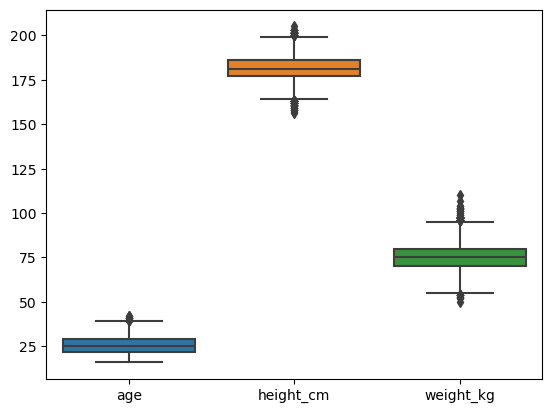

In [70]:
sns.boxplot(df.iloc[:, 1:5])

##### I don't feel these outliers are very muuch impactful. So, let it be like this for now. 

<Axes: >

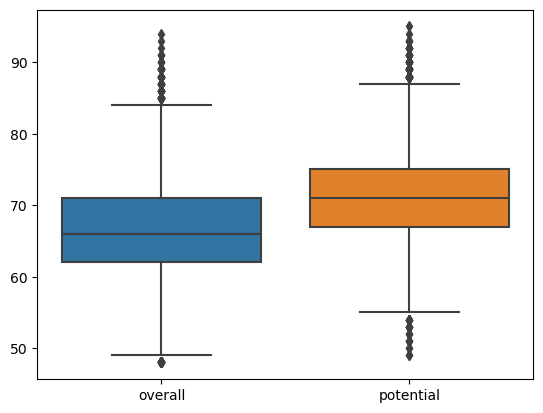

In [72]:
sns.boxplot(df.iloc[:, 5:9])

##### The same with these outliers as well. 

<Axes: >

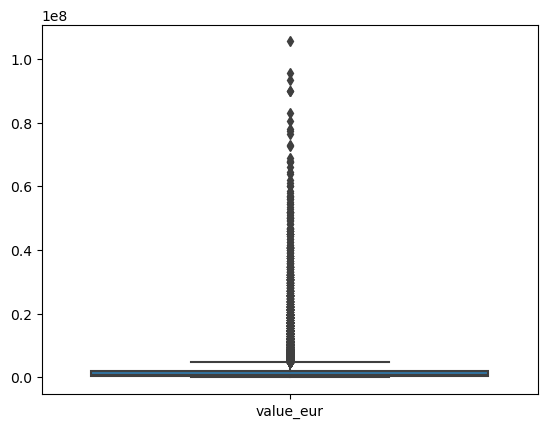

In [74]:
sns.boxplot(df.iloc[:, 9:10])

##### This seems a little bit different -> okay, let's keep it aside to  be focused. 

<Axes: >

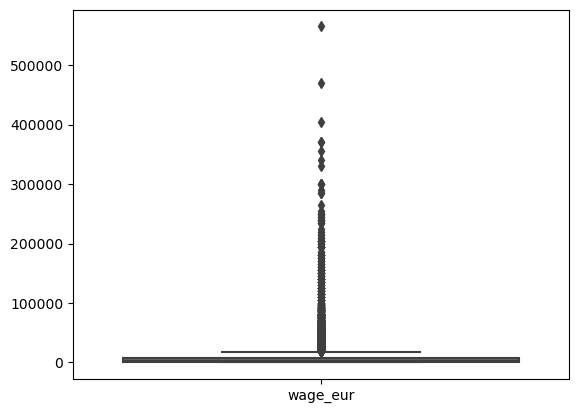

In [76]:
sns.boxplot(df.iloc[:, 10:11])

##### The same with wage_eur 

<Axes: >

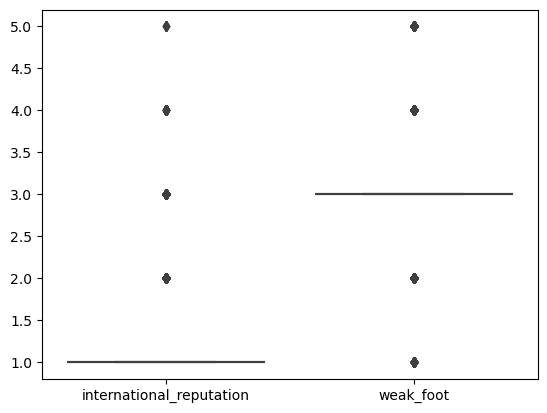

In [78]:
sns.boxplot(df.iloc[:, 11:15])

### Understandable, because some players are internationally so famous. Therefore, no need to focus on this one. 
And about weak_foot, we have to convert it to 0's and 1's. 

<Axes: >

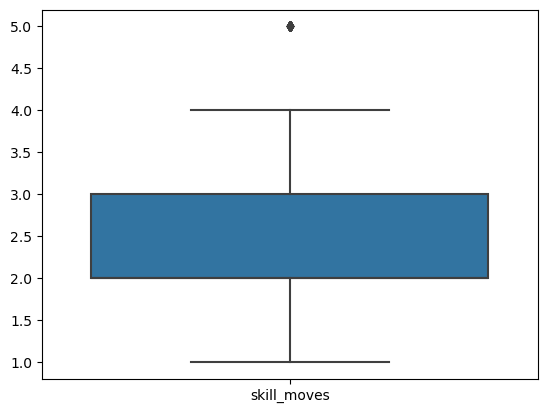

In [80]:
sns.boxplot(df.iloc[:, 15:16])

#### Not many outliers. 

<Axes: >

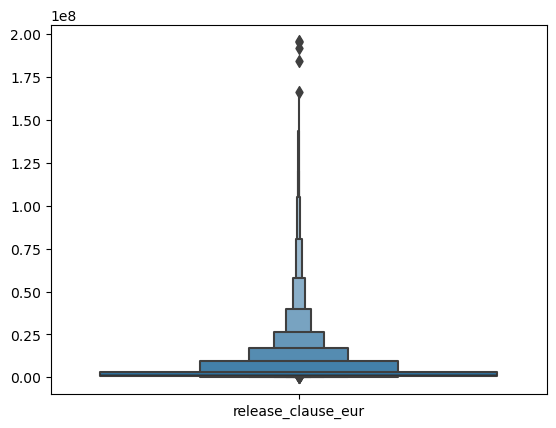

In [82]:
sns.boxenplot(df.iloc[:, 16:20])

#### Not very outliers. 

<Axes: >

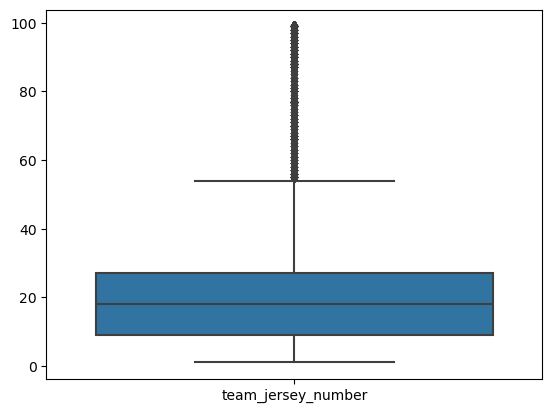

In [84]:
sns.boxplot(df.iloc[:, 20:21])

##### We can understand this one, because the team jersey number does not play much role. So, leave it. 

<Axes: >

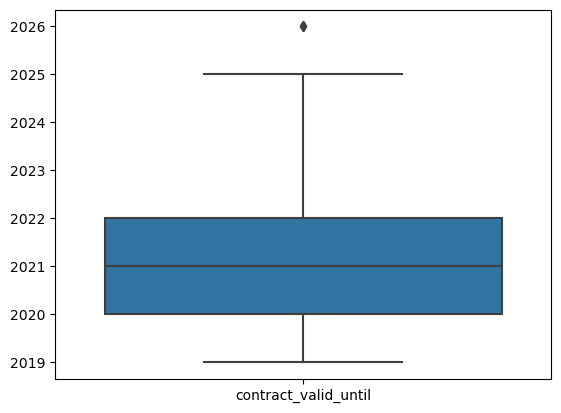

In [86]:
sns.boxplot(df.iloc[:, 21:22])

##### No need to take care of it. 

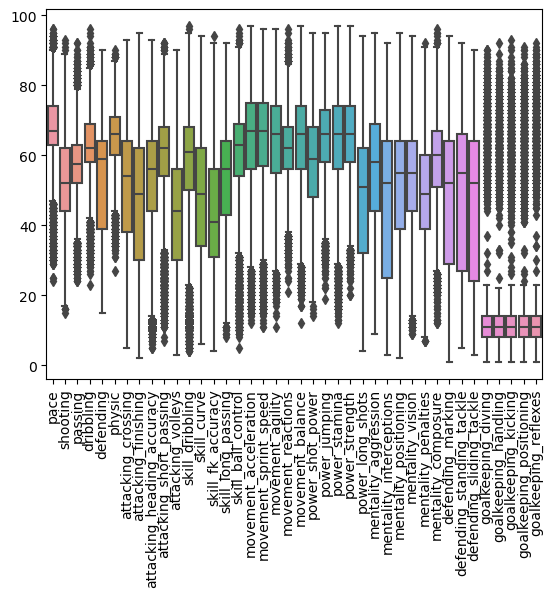

In [88]:
sns.boxplot(df.iloc[:, 22:63])
plt.xticks(rotation = 90)
plt.show()

##### These we need to take care of. As this have a certain pattern. Therefore we need take care of it. 

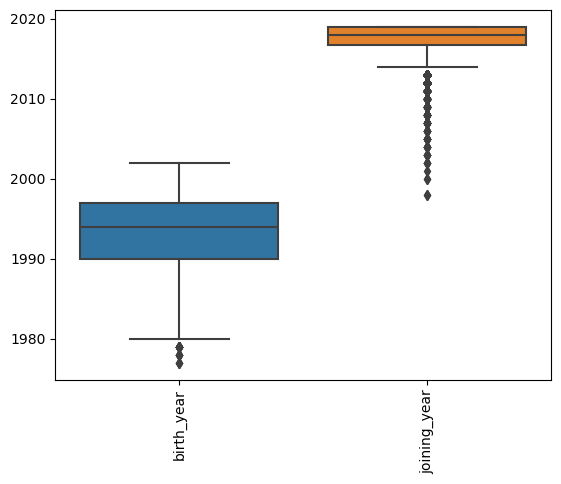

In [90]:
sns.boxplot(df.iloc[:, 63:65])
plt.xticks(rotation = 90)
plt.show()

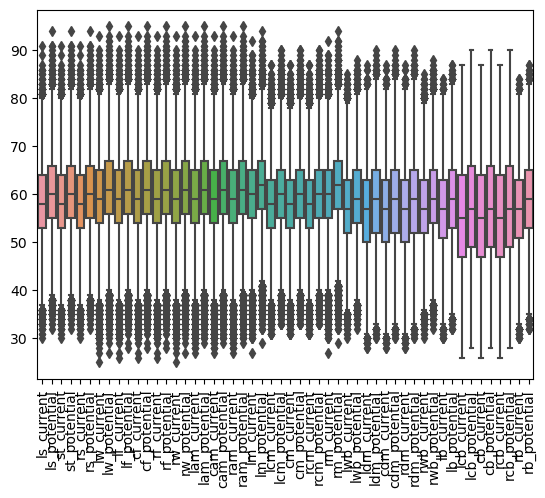

In [91]:
sns.boxplot(df.iloc[:, 65:121])
plt.xticks(rotation = 90)
plt.show()

### There are so many outliers we have in this dataset. We need to verify whether these are actually outliers or not. 

#### I have decided to not go with outliers handling as if i get to model, I will be using DBSCAN which can handle outliers on its own.

# Step 6: EDA. 

In [95]:
df

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,real_face,release_clause_eur,team_position,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,birth_year,joining_year,AttackWorkRate,DefenseWorkRate,ls_current,ls_potential,st_current,st_potential,rs_current,rs_potential,lw_current,lw_potential,lf_current,lf_potential,cf_current,cf_potential,rf_current,rf_potential,rw_current,rw_potential,lam_current,lam_potential,cam_current,cam_potential,ram_current,ram_potential,lm_current,lm_potential,lcm_current,lcm_potential,cm_current,cm_potential,rcm_current,rcm_potential,rm_current,rm_potential,lwb_current,lwb_potential,ldm_current,ldm_potential,cdm_current,cdm_potential,rdm_current,rdm_potential,rwb_current,rwb_potential,lb_current,lb_potential,lcb_current,lcb_potential,cb_current,cb_potential,rcb_current,rcb_potential,rb_current,rb_potential,player_traits_prior
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Messi,Yes,1.958000e+08,RW,10.0,2021.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1987,2004.00000,Medium,Low,89.000000,91.000000,89.000000,91.000000,89.000000,91.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.00000,93.000000,95.000000,93.000000,95.000000,92.000000,94.000000,87.000000,89.000000,87.000000,89.000000,87.000000,89.000000,92.000000,94.000000,68.000000,70.000000,66.000000,68.000000,66.000000,68.000000,66.000000,68.00000,68.00000,70.000000,63.000000,65.000000,52.000000,54.000000,52.000000,54.000000,52.000000,54.000000,63.00000,65.000000,Beat Offside Trap
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,C. Ronaldo,Yes,9.650000e+07,LW,7.0,2022.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,1985,2018.00000,High,Low,91.000000,94.000000,91.000000,94.000000,91.000000,94.000000,89.000000,92.000000,90.000000,93.000000,90.000000,93.000000,90.000000,93.000000,89.000000,92.000000,88.000000,91.00000,88.000000,91.000000,88.000000,91.000000,88.000000,91.000000,81.000000,84.000000,81.000000,84.000000,81.000000,84.000000,88.000000,91.000000,65.000000,68.000000,61.000000,64.000000,61.000000,64.000000,61.000000,64.00000,65.00000,68.000000,61.000000,64.000000,53.000000,56.000000,53.000000,56.000000,53.000000,56.000000,61.00000,64.000000,Long Throw-in
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,Neymar,Yes,1.952000e+08,CAM,10.0,2022.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,1992,2017.00000,High,Medium,84.000000,87.000000,84.000000,87.000000,84.000000,87.000000,90.000000,93.000000,89

## Let's answer the questions provided to us. -> Task 3. 

### 1. Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

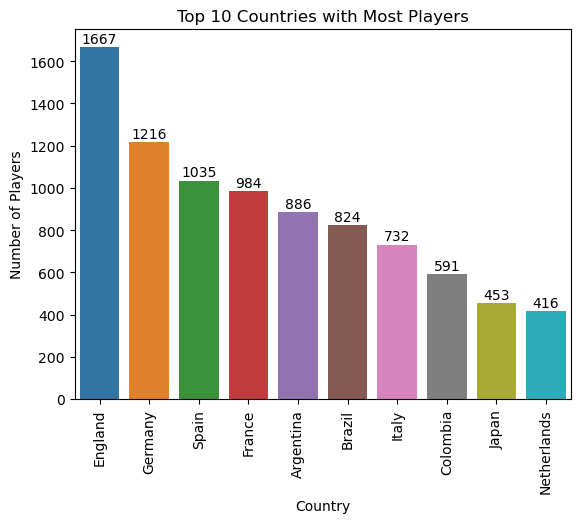

In [98]:
# 1. Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
top_10_country_name = df['nationality'].value_counts()[:10].index
top_10_country_name_values = df['nationality'].value_counts()[:10].values

top_10_df = pd.DataFrame({
    'Country': top_10_country_name,
    'Number of Players': top_10_country_name_values
})

ax = sns.barplot(x='Country', y='Number of Players', data=top_10_df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Top 10 Countries with Most Players')

# Values on the bars just like in tableau. 
for i in range(len(top_10_df)):
    ax.text(i, top_10_df['Number of Players'].iloc[i] + 5,  
            str(top_10_df['Number of Players'].iloc[i]),  
            ha='center', 
            va='bottom',  
            fontsize=10,  
            color='black') 
plt.show()


### 2. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

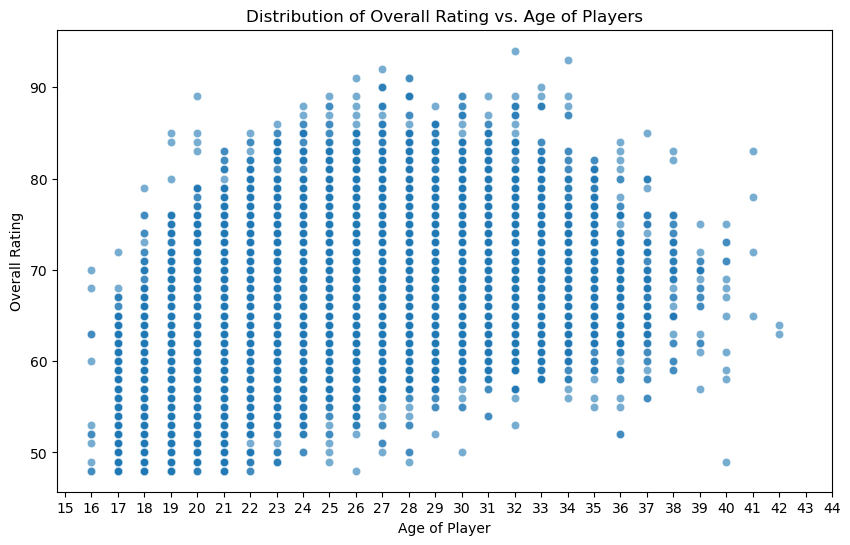

In [100]:
# 2: Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='overall', data=df, alpha=0.6)
plt.xlabel('Age of Player')
plt.ylabel('Overall Rating')
plt.xticks(np.arange(15,45))
plt.title('Distribution of Overall Rating vs. Age of Players')
plt.show()

#### From the above plot after carefully analyzing it we can say that, 
After the age of 32 the players stops improving much. 

### 3. Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?  

team_position
LW    23308.641975
RW    21024.844720
ST    16451.965066
Name: wage_eur, dtype: float64


<Axes: xlabel='Player_position', ylabel='Player_wage'>

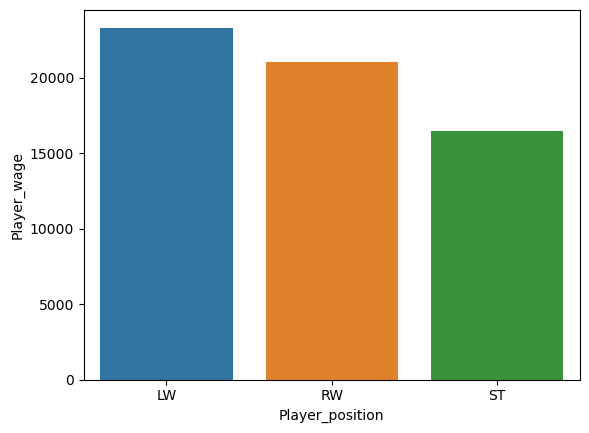

In [103]:
# 3: Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?  
# Filtering the dataset for the positions of interest (Striker, Right Winger, Left Winger)
offensive_positions = ['ST', 'RW', 'LW']  
offensive_players = df[df['team_position'].isin(offensive_positions)]

# Group by position and calculate the average wage
salary_by_position = offensive_players.groupby('team_position')['wage_eur'].mean().sort_values(ascending=False)
print(salary_by_position)

# Let's plot. 
offensive_positions_plt = salary_by_position.index
offensive_positions_plt_wage = salary_by_position.values
most_paid_op = pd.DataFrame({'Player_position': offensive_positions_plt, 'Player_wage': offensive_positions_plt_wage})
sns.barplot(data=most_paid_op, x='Player_position', y='Player_wage')

## Some more possible analysis:

### 1: Historical comparision between  Messi and Ronaldo.

In [106]:
# Filtering out the dataset for Messi and Ronaldo
messi_ronaldo = df[df['short_name'].isin(['L. Messi', 'Cristiano Ronaldo'])]

# Display their key stats for comparison
messi_ronaldo_stats = messi_ronaldo[['short_name', 'age', 'joining_year','contract_valid_until', 'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation', 'skill_moves', 'team_position', 'movement_sprint_speed', 'power_jumping', 'power_long_shots', 'AttackWorkRate', 'DefenseWorkRate', 'player_traits_prior']]

print(messi_ronaldo_stats)

          short_name  age  joining_year  contract_valid_until  overall  \
0           L. Messi   32        2004.0                2021.0       94   
1  Cristiano Ronaldo   34        2018.0                2022.0       93   

   potential  value_eur  wage_eur preferred_foot  international_reputation  \
0         94   95500000    565000           Left                         5   
1         93   58500000    405000          Right                         5   

   skill_moves team_position  movement_sprint_speed  power_jumping  \
0            4            RW                     84             68   
1            5            LW                     91             95   

   power_long_shots AttackWorkRate DefenseWorkRate player_traits_prior  
0                94         Medium             Low   Beat Offside Trap  
1                93           High             Low       Long Throw-in  


#### From the above data we can say that, 
1. Messi featured in the game from the year 2004 because of him being the young player and popularity.
2. Whereas Ronaldo was first featured in 2018 in the video game.
3. From the metrics we can say that in terms of strength and power and stamina, Ronaldo is better than Messi.
4. We can see that both international reputation is well known.
5. We can also see that the wage in euros is realtively different for both, that is Ronaldo's wage is lesser than Messi's. Here's the twist, in the above analysis we have seen that the highest wage for the position is for LW. But in this case, the Ronaldo's wage is particularly less than Messi's. I did some reasearch and I got the answer:
   Messi's wage being higher than Ronaldo's could be due to Messi's long-standing importance to Barcelona, his global brand, and his higher historical wages, while Ronaldo's move to Juventus may have come with a different salary structure and club financial context.
6. If we actaully say totally based on Numbers, Ronaldo seems to be better than Messi.
7. But, Messi is from the very long time and been popular. 

### 2: Ideal budget to create a competitive team

In [109]:
top_players = df.nlargest(11, 'overall')  
team_budget = top_players['wage_eur'].sum()  
print(f"Total budget for top 11 players: {team_budget}")

Total budget for top 11 players: 3410000


### 3. Get the number of top n% players

In [111]:
# Sort the players by 'overall' rating in descending order
sorted_players = df.sort_values(by='overall', ascending=False)

# Get the number of top n% players
n_percent = 5  
num_top_players = int(len(sorted_players) * n_percent / 100)
top_n_players = sorted_players.head(num_top_players)


In [112]:
average_stats = top_n_players[['overall', 'potential', 'wage_eur', 'age', 'dribbling', 'shooting', 'passing', 'defending']].mean()

print(average_stats)

overall         81.040526
potential       82.778751
wage_eur     67474.260679
age             27.889376
dribbling       74.296755
shooting        64.698046
passing         70.646415
defending       62.233520
dtype: float64


### 4. Compare with 95%. 

In [114]:
# Get the rest of the players (bottom 95%)
rest_of_players = sorted_players.tail(len(sorted_players) - num_top_players)

# Calculating the average stats for the rest of the players
average_rest_stats = rest_of_players[['overall', 'potential', 'wage_eur', 'age', 'dribbling', 'shooting', 'passing', 'defending']].mean()

print("Average stats of top 5% players:")
print(average_stats)
print("\nAverage stats of the rest of the players:")
print(average_rest_stats)

Average stats of top 5% players:
overall         81.040526
potential       82.778751
wage_eur     67474.260679
age             27.889376
dribbling       74.296755
shooting        64.698046
passing         70.646415
defending       62.233520
dtype: float64

Average stats of the rest of the players:
overall        65.467089
potential      70.956349
wage_eur     6406.564929
age            25.146271
dribbling      61.846055
shooting       50.877525
passing        56.578777
defending      52.015552
dtype: float64


### 5. the distribution of positions among the top 5% players

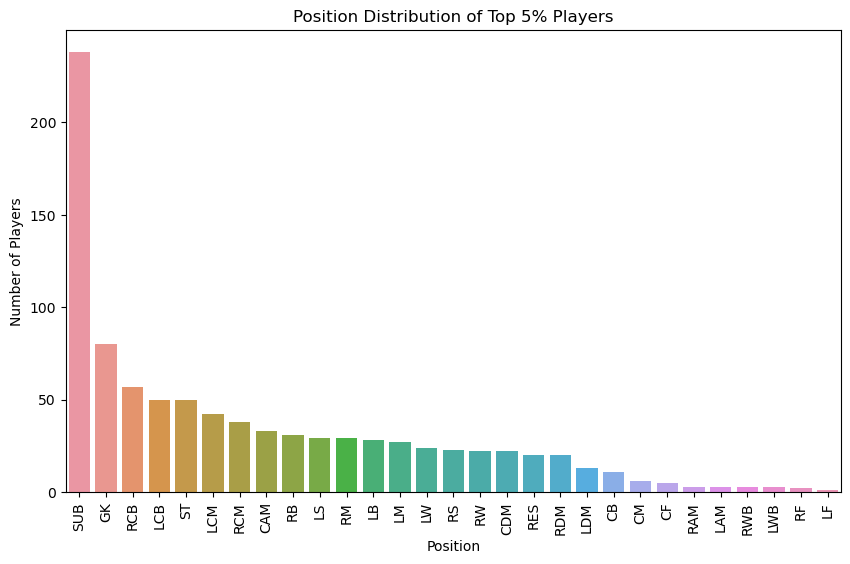

In [116]:
position_counts = top_n_players['team_position'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title(f'Position Distribution of Top {n_percent}% Players')
plt.xticks(rotation=90)
plt.show()

## some curious analysis: 

In [118]:
# 1. Avg Age of player in the dataset. 
df['age'].mean()

25.283291388554545

In [119]:
# 2: Top 5 highest valued players. 
df.sort_values(['value_eur'], ascending=False)[:5][['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur']]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000


In [120]:
# 3: Heaviest Player as we have seen some weight being outliers. 
df.sort_values(['weight_kg'], ascending=False)[:1][['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur']]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur
10693,A. Akinfenwa,37,178,110,England,Wycombe Wanderers,65,65,190000


In [121]:
# 4: Tallest player: 
df.sort_values(['height_cm'], ascending=False)[:1][['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur']]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur
9208,T. Holý,27,205,102,Czech Republic,Ipswich Town,66,70,575000


# Let's save the cleaned dataset ans start working n Task -2 

In [123]:
df.to_csv('cleaned_df.csv')

# Task - 2 : Explore football skills and cluster football players based on their attributes.

In [125]:
df = pd.read_csv('cleaned_df.csv')

In [126]:
df = df.drop('Unnamed: 0', axis=1)

In [127]:
df.head(1)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,real_face,release_clause_eur,team_position,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,birth_year,joining_year,AttackWorkRate,DefenseWorkRate,ls_current,ls_potential,st_current,st_potential,rs_current,rs_potential,lw_current,lw_potential,lf_current,lf_potential,cf_current,cf_potential,rf_current,rf_potential,rw_current,rw_potential,lam_current,lam_potential,cam_current,cam_potential,ram_current,ram_potential,lm_current,lm_potential,lcm_current,lcm_potential,cm_current,cm_potential,rcm_current,rcm_potential,rm_current,rm_potential,lwb_current,lwb_potential,ldm_current,ldm_potential,cdm_current,cdm_potential,rdm_current,rdm_potential,rwb_current,rwb_potential,lb_current,lb_potential,lcb_current,lcb_potential,cb_current,cb_potential,rcb_current,rcb_potential,rb_current,rb_potential,player_traits_prior
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Messi,Yes,195800000.0,RW,10.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1987,2004.0,Medium,Low,89.0,91.0,89.0,91.0,89.0,91.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,93.0,95.0,92.0,94.0,87.0,89.0,87.0,89.0,87.0,89.0,92.0,94.0,68.0,70.0,66.0,68.0,66.0,68.0,66.0,68.0,68.0,70.0,63.0,65.0,52.0,54.0,52.0,54.0,52.0,54.0,63.0,65.0,Beat Offside Trap


### Step 1: Select relevant columns: 

In [129]:
columns = df.columns
columns = columns.to_list()
columns

['sofifa_id',
 'short_name',
 'age',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'body_type',
 'real_face',
 'release_clause_eur',
 'team_position',
 'team_jersey_number',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'me

In [130]:
# age, height, weight, overall, potential, preferred foot, skill moves, team position, pace, shooting, passing, dribbling, physic, movement sprint speed, movement agility, power shot power, power jumping, power long shots, attack work rate, defense work rate, skill ball cotnrol, movement acceleration, defending, goal keeping, 
features = df[columns[2:5]]
features[columns[7:9]] = df[columns[7:9]]
features[columns[12:16]] = df[columns[12:16]]
features[columns[19:20]] = df[columns[19:20]]
features[columns[22:28]] = df[columns[22:28]]
features[columns[38:49]] = df[columns[38:49]]
features[columns[55:63]] = df[columns[55:63]]
features[columns[65:67]] = df[columns[65:67]]
features

,age,height_cm,weight_kg,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,AttackWorkRate,DefenseWorkRate
0,32,170,72,94,94,Left,5,4,4,RW,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,96,91,84,93,95,95,86,68,75,68,94,33,37,26,6,11,15,14,8,Medium,Low
1,34,187,83,93,93,Right,5,4,5,LW,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,92,89,91,87,96,71,95,95,85,78,93,28,32,24,7,11,15,14,11,High,Low
2,27,175,68,92,92,Right,5,5,5,CAM,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,95,94,89,96,92,84,80,61,81,49,84,27,26,29,9,9,15,15,11,High,Medium
3,26,188,87,91,93,Right,3,3,1,GK,66.521209,45.740935,57.661909,61.960555,60.283529,66.052041,30,43,60,67,88,49,59,78,41,78,12,27,12,18,87,92,78,90,89,Medium,Medium
4,28,175,74,91,91,Right,4,4,4,LW,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,94,94,88,95,90,94,82,56,84,63,80,34,27,22,11,12,6,8,8,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,Right,1,3,2,RES,57.000000,23.000000,28.000000,33.000000,47.000000,51.000000,35,56,58,45,40,73,36,70,60,47,16,45,50,52,5,5,13,5,14,Medium,High
18274,22,177,66,48,56,Right,1,2,2,SUB,58.000000,24.000000,33.000000,35.000000,48.000000,48.000000,31,55,61,43,41,76,33,72,55,44,20,42,53,57,13,6,14,11,9,Medium,Medium
18275,19,186,75,48,56,Right,1,2,2,SUB,54.000000,35.000000,44.000000,45.000000,48.000000,51.000000,49,55,54,52,52,57,48,60,50,51,26,46,52,46,7,8,10,6,14,Low,Medium
18276,18,185,74,48,54,Right,1,2,2,SUB,59.000000,35.000000,47.000000,47.000000,45.000000,52.000000,49,55,63,55,54,59,46,61,42,55,28,39,44,54,14,9,13,13,13,Low,Low


### Step 2: Handle the categorical values. 

In [132]:
cat_cols = features.select_dtypes(include=['object'])

In [133]:
cat_cols = cat_cols.columns
cat_cols = cat_cols.to_list()

In [134]:
cat_cols

['preferred_foot', 'team_position', 'AttackWorkRate', 'DefenseWorkRate']

#### 1. Handling preferred foot -> label: left:0 and right:1 

In [136]:
features['preferred_foot'] = features['preferred_foot'].replace({'Right':1, 'Left':0})

#### 2: handling attackwork rate and defense workrate. -> label low = 0, medium = 0.5, high =1 

In [138]:
for col in cat_cols[2:4]:
    features[col] = features[col].replace({'Low':0, 'Medium':0.5, 'High':1})

#### 3: handling team posiiton -> 

In [140]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features['team_position'] = encoder.fit_transform(features['team_position'])

In [141]:
features

,age,height_cm,weight_kg,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,AttackWorkRate,DefenseWorkRate
0,32,170,72,94,94,0,5,4,4,25,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,96,91,84,93,95,95,86,68,75,68,94,33,37,26,6,11,15,14,8,0.5,0.0
1,34,187,83,93,93,1,5,4,5,14,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,92,89,91,87,96,71,95,95,85,78,93,28,32,24,7,11,15,14,11,1.0,0.0
2,27,175,68,92,92,1,5,5,5,0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,95,94,89,96,92,84,80,61,81,49,84,27,26,29,9,9,15,15,11,1.0,0.5
3,26,188,87,91,93,1,3,3,1,5,66.521209,45.740935,57.661909,61.960555,60.283529,66.052041,30,43,60,67,88,49,59,78,41,78,12,27,12,18,87,92,78,90,89,0.5,0.5
4,28,175,74,91,91,1,4,4,4,14,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,94,94,88,95,90,94,82,56,84,63,80,34,27,22,11,12,6,8,8,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,1,1,3,2,21,57.000000,23.000000,28.000000,33.000000,47.000000,51.000000,35,56,58,45,40,73,36,70,60,47,16,45,50,52,5,5,13,5,14,0.5,1.0
18274,22,177,66,48,56,1,1,2,2,28,58.000000,24.000000,33.000000,35.000000,48.000000,48.000000,31,55,61,43,41,76,33,72,55,44,20,42,53,57,13,6,14,11,9,0.5,0.5
18275,19,186,75,48,56,1,1,2,2,28,54.000000,35.000000,44.000000,45.000000,48.000000,51.000000,49,55,54,52,52,57,48,60,50,51,26,46,52,46,7,8,10,6,14,0.0,0.5
18276,18,185,74,48,54,1,1,2,2,28,59.000000,35.000000,47.000000,47.000000,45.000000,52.000000,49,55,63,55,54,59,46,61,42,55,28,39,44,54,14,9,13,13,13,0.0,0.0


### Step 3 and Step 4: Scaling and applying clustrering algorithms. 

cluster
2    4614
1    4122
0    3792
3    3714
4    2036
Name: count, dtype: int64


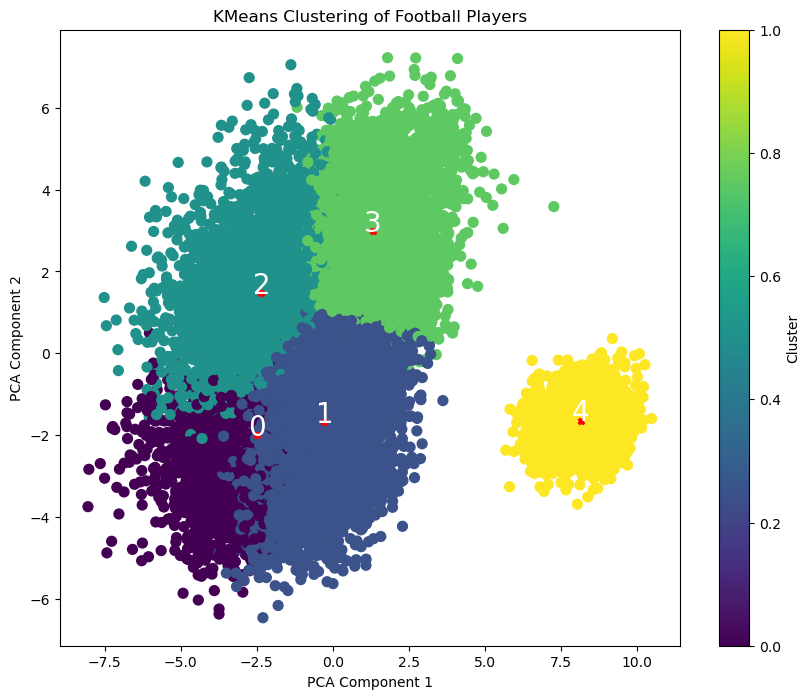

In [144]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Applying KMeans
kmeans = KMeans(n_clusters=5, random_state=42) 
df['cluster'] = kmeans.fit_predict(scaled_features)

# Checking the cluster counts
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

# Visualizing the clusters (using PCA to reduce dimensionality to 2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['cluster'], cmap='viridis', s=50)
# Adding cluster centers 
centers = kmeans.cluster_centers_
reduced_centers = pca.transform(centers)
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='X', color='red', s=20, label='Centroids')
# Annotating
for i, center in enumerate(reduced_centers):
    plt.annotate(f'{i}', (center[0], center[1]), color='white', fontsize=20, ha='center')

plt.title('KMeans Clustering of Football Players')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

##### Notes:
1. I manually tried with n_clusters as 3, 6, 7 ... 10. I got the best result with 5 clusters. Hence, I did not used Elbow method to find the optimal value of n_clusters.
2. I first tried with DBSCAN but all my datapoints were being considered as outliers which made me jump to the another algorithm than DBSCAN. 

In [146]:
df

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,real_face,release_clause_eur,team_position,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,birth_year,joining_year,AttackWorkRate,DefenseWorkRate,ls_current,ls_potential,st_current,st_potential,rs_current,rs_potential,lw_current,lw_potential,lf_current,lf_potential,cf_current,cf_potential,rf_current,rf_potential,rw_current,rw_potential,lam_current,lam_potential,cam_current,cam_potential,ram_current,ram_potential,lm_current,lm_potential,lcm_current,lcm_potential,cm_current,cm_potential,rcm_current,rcm_potential,rm_current,rm_potential,lwb_current,lwb_potential,ldm_current,ldm_potential,cdm_current,cdm_potential,rdm_current,rdm_potential,rwb_current,rwb_potential,lb_current,lb_potential,lcb_current,lcb_potential,cb_current,cb_potential,rcb_current,rcb_potential,rb_current,rb_potential,player_traits_prior,cluster
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Messi,Yes,1.958000e+08,RW,10.0,2021.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,1987,2004.00000,Medium,Low,89.000000,91.000000,89.000000,91.000000,89.000000,91.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.000000,93.000000,95.00000,93.000000,95.000000,93.000000,95.000000,92.000000,94.000000,87.000000,89.000000,87.000000,89.000000,87.000000,89.000000,92.000000,94.000000,68.000000,70.000000,66.000000,68.000000,66.000000,68.000000,66.000000,68.00000,68.00000,70.000000,63.000000,65.000000,52.000000,54.000000,52.000000,54.000000,52.000000,54.000000,63.00000,65.000000,Beat Offside Trap,0
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,C. Ronaldo,Yes,9.650000e+07,LW,7.0,2022.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,1985,2018.00000,High,Low,91.000000,94.000000,91.000000,94.000000,91.000000,94.000000,89.000000,92.000000,90.000000,93.000000,90.000000,93.000000,90.000000,93.000000,89.000000,92.000000,88.000000,91.00000,88.000000,91.000000,88.000000,91.000000,88.000000,91.000000,81.000000,84.000000,81.000000,84.000000,81.000000,84.000000,88.000000,91.000000,65.000000,68.000000,61.000000,64.000000,61.000000,64.000000,61.000000,64.00000,65.00000,68.000000,61.000000,64.000000,53.000000,56.000000,53.000000,56.000000,53.000000,56.000000,61.00000,64.000000,Long Throw-in,0
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,Neymar,Yes,1.952000e+08,CAM,10.0,2022.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,1992,2017.00000,High,Medium,84.000000,87.000000,84.000000,87.000000,84.000000,87.000000,90.000000,

In [148]:
features['cluster'] = df['cluster']

In [150]:
features

,age,height_cm,weight_kg,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,AttackWorkRate,DefenseWorkRate,cluster
0,32,170,72,94,94,0,5,4,4,25,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,96,91,84,93,95,95,86,68,75,68,94,33,37,26,6,11,15,14,8,0.5,0.0,0
1,34,187,83,93,93,1,5,4,5,14,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,92,89,91,87,96,71,95,95,85,78,93,28,32,24,7,11,15,14,11,1.0,0.0,0
2,27,175,68,92,92,1,5,5,5,0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,95,94,89,96,92,84,80,61,81,49,84,27,26,29,9,9,15,15,11,1.0,0.5,0
3,26,188,87,91,93,1,3,3,1,5,66.521209,45.740935,57.661909,61.960555,60.283529,66.052041,30,43,60,67,88,49,59,78,41,78,12,27,12,18,87,92,78,90,89,0.5,0.5,4
4,28,175,74,91,91,1,4,4,4,14,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,94,94,88,95,90,94,82,56,84,63,80,34,27,22,11,12,6,8,8,1.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,1,1,3,2,21,57.000000,23.000000,28.000000,33.000000,47.000000,51.000000,35,56,58,45,40,73,36,70,60,47,16,45,50,52,5,5,13,5,14,0.5,1.0,3
18274,22,177,66,48,56,1,1,2,2,28,58.000000,24.000000,33.000000,35.000000,48.000000,48.000000,31,55,61,43,41,76,33,72,55,44,20,42,53,57,13,6,14,11,9,0.5,0.5,1
18275,19,186,75,48,56,1,1,2,2,28,54.000000,35.000000,44.000000,45.000000,48.000000,51.000000,49,55,54,52,52,57,48,60,50,51,26,46,52,46,7,8,10,6,14,0.0,0.5,1
18276,18,185,74,48,54,1,1,2,2,28,59.000000,35.000000,47.000000,47.000000,45.000000,52.000000,49,55,63,55,54,59,46,61,42,55,28,39,44,54,14,9,13,13,13,0.0,0.0,1


## Conclusion 

### I have successfully completed all the task. 